In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sys
sys.path.insert(0, "python")
from network import *
from protocols import *
from adversary import *
from simulator import *

In [3]:
def shorten_protocol_name(x: str):
    val = x.replace("Protocol","").replace("spreading_proba","p")
    val = val.split("broadcast")[0][:-1].replace("(", ": ")
    if val[-1] == ",":
        val = val[:-1]
    return val

In [4]:
nw_generator = NodeWeightGenerator("random")
ew_generator = EdgeWeightGenerator("normal")

# Dandelion example

In [5]:
from data import GoerliTestnet
goerli = GoerliTestnet()
betweenness_scores = nx.betweenness_centrality(goerli.graph)

In [6]:
net = Network(nw_generator, ew_generator, graph=goerli.graph)

In [7]:
net.num_nodes

1355

In [8]:
dp = DandelionProtocol(net, 0.5)

#### Running time
- For goerli (1K nodes): 5 sec
- Random regular 100N 10REG: 100 ms
- Random regular 1000N 20REG: 4 sec

#### Spread ratio
- Goerli: around 0.8
- Random regular 100N 10REG: 1.0
- Random regular 1000N 20REG: 1.0 sec

In [9]:
%%time
adv = Adversary(net, 0.1)
sim = Simulator(dp, adv, 30, verbose=False)
sim.run()

CPU times: user 14.8 s, sys: 95.3 ms, total: 14.9 s
Wall time: 14.9 s


[0.862730627306273,
 0.7830258302583026,
 0.8560885608856088,
 0.8103321033210332,
 0.8273062730627306,
 0.803690036900369,
 0.8634686346863468,
 0.7911439114391144,
 0.8206642066420664,
 0.8066420664206642,
 0.7977859778597786,
 0.8376383763837638,
 0.8678966789667897,
 0.8516605166051661,
 0.8265682656826568,
 0.8391143911439114,
 0.7763837638376384,
 0.829520295202952,
 0.8095940959409594,
 0.8664206642066421,
 0.8066420664206642,
 0.7985239852398524,
 0.8376383763837638,
 0.792619926199262,
 0.8435424354243543,
 0.8273062730627306,
 0.811070110701107,
 0.7800738007380074,
 0.7970479704797048,
 0.8236162361623616]

In [10]:
for estimator in ["first_reach","first_sent","dummy"]:
    print(Evaluator(sim, estimator).get_report())

{'estimator': 'first_reach', 'hit_ratio': 0.26666666666666666, 'inverse_rank': 0.2803391827257895, 'entropy': 0.0, 'ndcg': 0.3635986872613817, 'message_spread_ratio': 0.8215252152521526}
{'estimator': 'first_sent', 'hit_ratio': 0.5, 'inverse_rank': 0.5131138675440658, 'entropy': 0.0, 'ndcg': 0.570399369089474, 'message_spread_ratio': 0.8215252152521526}
{'estimator': 'dummy', 'hit_ratio': 0.0, 'inverse_rank': 0.020348743557168758, 'entropy': 7.106606137727305, 'ndcg': 0.13387510956388834, 'message_spread_ratio': 0.8215252152521526}


# Dandelion example with adversaries as central nodes

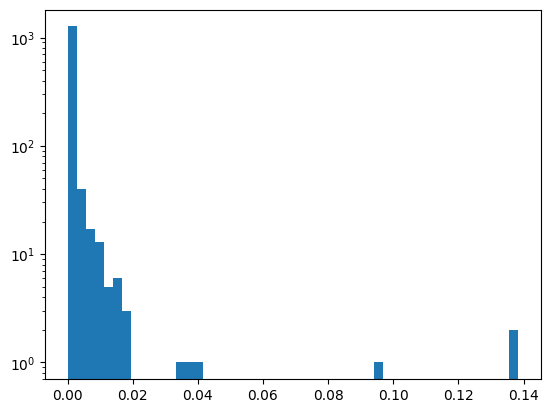

In [11]:
plt.hist(list(dict(betweenness_scores).values()), bins=50)
plt.yscale("log")
plt.show()

In [22]:
net_central = Network(NodeWeightGenerator("degree"), ew_generator, graph=goerli.graph)

In [23]:
net_central.num_nodes

1355

In [24]:
dp_central = DandelionProtocol(net_central, 0.5)

In [25]:
%%time
adv_central = Adversary(net, 0.1, use_node_weights=True)
sim_central = Simulator(dp_central, adv_central, 30, verbose=False)
sim_central.run()

CPU times: user 19.2 s, sys: 156 ms, total: 19.3 s
Wall time: 19.3 s


[0.8265682656826568,
 0.822140221402214,
 0.796309963099631,
 0.8236162361623616,
 0.8346863468634687,
 0.7313653136531365,
 0.8501845018450185,
 0.788929889298893,
 0.8413284132841329,
 0.8044280442804428,
 0.8309963099630996,
 0.803690036900369,
 0.7940959409594096,
 0.8103321033210332,
 0.8376383763837638,
 0.8324723247232473,
 0.803690036900369,
 0.8287822878228782,
 0.829520295202952,
 0.8346863468634687,
 0.8206642066420664,
 0.8413284132841329,
 0.8287822878228782,
 0.7328413284132841,
 0.811070110701107,
 0.818450184501845,
 0.8531365313653136,
 0.7785977859778598,
 0.8560885608856088,
 0.8132841328413284]

### What is this error for "first_sent" with relevant node weights?

In [26]:
for estimator in ["first_reach","first_sent","dummy"]:
    print(Evaluator(sim_central, estimator).get_report())

{'estimator': 'first_reach', 'hit_ratio': 0.26666666666666666, 'inverse_rank': 0.2758567072637053, 'entropy': 0.0, 'ndcg': 0.3628971823728506, 'message_spread_ratio': 0.815990159901599}


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'